In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
%matplotlib inline

import pyscisci.all as pyscisci

import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# to make pretty plots
try:
    import seaborn as sns
    sns.set_style('white')
except:
    pass



In [3]:
# Derek J. de Solla Price
focus_aid = 2537508914

path2mag = '/home/ajgates/MAG'

mymag = pyscisci.MAG(path2mag, keep_in_memory=False, show_progress=True) 


In [4]:
author_career = mymag.load_publicationauthoraffiliation(columns=['PublicationId', 'AuthorId', 'AffiliationId'],
                                                        filter_dict = {'AuthorId':np.sort([focus_aid])},
                                                      duplicate_subset=['PublicationId', 'AuthorId', 'AffiliationId'])


In [5]:
authorpubs = np.sort(author_career['PublicationId'].unique())

author_pub = mymag.load_publications(columns=['PublicationId', 'Year', 'Date', 'JournalId'],
                                                        filter_dict = {'PublicationId':authorpubs})


author_career = author_career[['PublicationId', 'AuthorId', 'AffiliationId']].merge(author_pub, how='left', on='PublicationId')
author_career



,PublicationId,AuthorId,AffiliationId,Year,Date,JournalId
0,136203353,2537508914,NaN,1980.0,1980-04-01,3.886634e+07
1,421174974,2537508914,NaN,1986.0,1986-08-01,NaN
2,1546171873,2537508914,NaN,1965.0,1965-01-01,NaN
3,1635244065,2537508914,NaN,1974.0,1974-01-01,NaN
4,1673071179,2537508914,NaN,1954.0,1954-08-01,1.377736e+08
...,...,...,...,...,...,...
66,2339952710,2537508914,NaN,1978.0,1978-12-01,1.306119e+08
67,2588497460,2537508914,32971472.0,1978.0,1978-06-01,2.735378e+09
68,2795789037,2537508914,NaN,1956.0,1956-01-01,7.750319e+07
69,2998760578,2537508914,NaN,1955.0,1955-01-01,NaN


In [6]:
authorpubs = np.sort(author_career['PublicationId'].unique())

author_impact = mymag.load_impact(filter_dict = {'PublicationId':authorpubs})

author_impact

,PublicationId,Ctotal,C10,C5,Year,Ctotal_noself,C10_noself,C5_noself,Ctotal_norm,C10_norm,C5_norm,Ctotal_noself_norm,C10_noself_norm,C5_noself_norm
28780915,1972191178,5,1.0,0.0,1946,5.0,1.0,0.0,0.391254,0.414120,0.000000,0.394567,0.429121,0.000000
18307600,2045241839,22,2.0,1.0,1947,22.0,2.0,1.0,1.665353,0.781813,0.704170,1.680022,0.810445,0.741693
17064410,1972538590,9,1.0,1.0,1952,9.0,1.0,1.0,0.677878,0.345254,0.641707,0.684987,0.358632,0.678803
38121596,2044809135,9,7.0,5.0,1952,9.0,7.0,5.0,0.677878,2.416776,3.208536,0.684987,2.510425,3.394016
18706241,2035705318,11,0.0,0.0,1953,10.0,0.0,0.0,0.770314,0.000000,0.000000,0.707650,0.000000,0.000000
53685231,2049281537,4,1.0,1.0,1953,4.0,1.0,1.0,0.280114,0.329675,0.612498,0.283060,0.342817,0.649417
55846031,1974521230,2,1.0,0.0,1954,2.0,1.0,0.0,0.135072,0.313118,0.000000,0.136601,0.326489,0.000000
15374569,2998760578,3,0.0,0.0,1955,3.0,0.0,0.0,0.196344,0.000000,0.000000,0.198694,0.000000,0.000000
41847646,2331959595,13,0.0,0.0,1955,13.0,0.0,0.0,0.850825,0.000000,0.000000,0.861008,0.000000,0.000000
56402150,1990240498,2,0.0,0.0,1955,2.0,0.0,0.0,0.130896,0.000000,0.000000,0.132463,0.000000,0.000000


In [7]:
author_career = author_career.merge(author_impact[['PublicationId', 'C10', 'Ctotal']], 
                                    how='left', on='PublicationId').fillna(0)
author_career.sort_values('Year', inplace=True)

In [9]:
author_career.to_hdf('/Users/ajgates/Desktop/DeSollaPriceCareer.hdf', key='pub', mode='w')

In [4]:
author_career = pd.read_hdf('/Users/ajgates/Desktop/DeSollaPriceCareer.hdf')

In [39]:
author_career['PublicationId'].nunique()

71

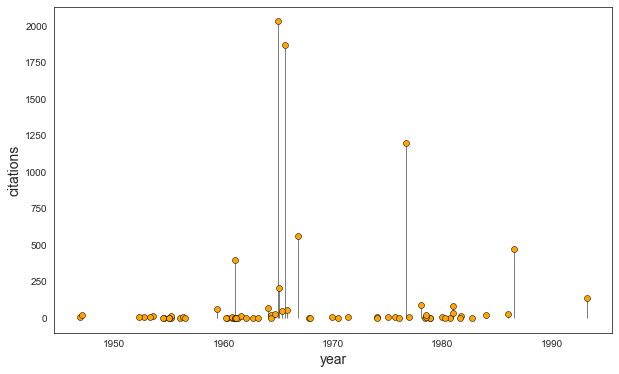

In [38]:
fig, ax = plt.subplots(1,1,figsize=(10,6))

ax = pyscisci.career_impacttimeline(author_career, datecol='Date', impactcol='Ctotal', 
                              fill_color='orange', edge_color='k', ax=ax)

ax.set_ylabel('citations', fontsize=14)
ax.set_xlabel('year', fontsize=14)
plt.savefig('DeSollaPriceCarrerCitations.pdf')
plt.show()

In [7]:
hindex = pyscisci.author_hindex(author_career, colgroupby='AuthorId', colcountby='Ctotal')
qfact = pyscisci.author_qfactor(author_career, colgroupby='AuthorId', colcountby='Ctotal')

qfact

/Users/ajgates/.pyenv/versions/3.9.0/lib/python3.9/site-packages/tqdm/std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


,AuthorId,AuthorIdQfactor
0,2537508914,14.101171


/Users/ajgates/.pyenv/versions/3.9.0/lib/python3.9/site-packages/tqdm/std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


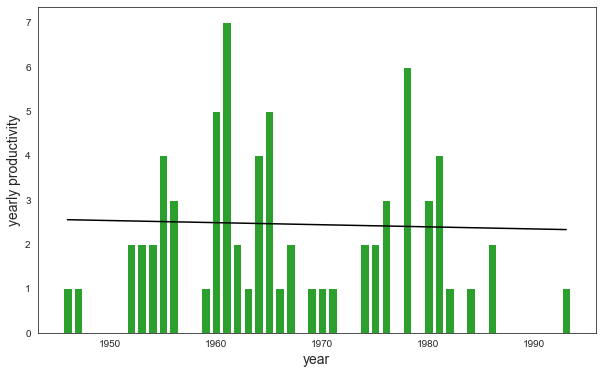

In [11]:

yearly_productivity = pyscisci.author_yearly_productivity(author_career, colgroupby='AuthorId', 
                                                          datecol='Year', colcountby='PublicationId')

prodtraj = pyscisci.author_productivity_trajectory(author_career, colgroupby = 'AuthorId', 
                                        datecol = 'Year', colcountby = 'PublicationId')

fig, ax = plt.subplots(1,1,figsize=(10,6))

ax = pyscisci.career_productivitytimeline(yearly_productivity, productivity_trajectory=prodtraj, 
                                          datecol='Year', fill_color=sns.color_palette()[2], ax=ax)

ax.set_ylabel('yearly productivity', fontsize=14)
ax.set_xlabel('year', fontsize=14)
plt.show()

In [5]:
focus_publications=np.sort([2080450835])

pub2ref = mymag.load_references(filter_dict={'CitingPublicationId':focus_publications})
pub2cite = mymag.load_references(filter_dict={'CitedPublicationId':focus_publications})

In [18]:
pub2year=mymag.pub2year
pub2ref['CitingYear'] = [pub2year.get(pid, None) for pid in pub2ref['CitingPublicationId']]

pub2cite['CitedYear'] = [pub2year.get(pid, None) for pid in pub2cite['CitedPublicationId']]

In [6]:
fieldinfo = mymag.fieldinfo_df
lvl1fields = np.sort(fieldinfo[fieldinfo['FieldLevel'] == 1]['FieldID'].unique())

allrefpubs = np.sort(np.unique(list(focus_publications) + list(pub2ref['CitedPublicationId'].unique()) + list(pub2cite['CitingPublicationId'].unique())))

pub2field = mymag.load_pub2field(filter_dict={'PublicationId':allrefpubs, 'FieldId':lvl1fields})



In [7]:
fullpub2ref = mymag.load_references()
print(fullpub2ref.shape)


(1595622871, 2)


In [9]:
reducedpub2ref = fullpub2ref.loc[pyscisci.isin_sorted(fullpub2ref['CitingPublicationId'].values, allrefpubs)]
reducedpub2ref = reducedpub2ref.loc[pyscisci.isin_sorted(reducedpub2ref['CitedPublicationId'].values, allrefpubs)]

print(reducedpub2ref.shape)


(4432, 2)


In [10]:
disrupt = pyscisci.disruption_index(reducedpub2ref, focus_pubs = focus_publications)
disrupt

,PublicationId,DisruptionIndex
0,2080450835,0.20166


In [35]:
#refdist = pd.read_hdf(os.path.join(path2mag, 'MAGfieldReferenceCosineDistanceMatrix.hdf'))
pyscisci.raostriling_interdisciplinarity(pub2ref, pub2field, focus_pub_ids = focus_publications,
                                         citation_direction = 'references', temporal=True,
                                        distance_matrix = refdist)

,PublicationId,CitingYear,RaoStirling
0,2080450835,1976,0.339572


In [37]:
citedist = pd.read_hdf(os.path.join(path2mag, 'MAGfieldCitationCosineDistanceMatrix.hdf'))
pyscisci.raostriling_interdisciplinarity(pub2cite, pub2field, focus_pub_ids = focus_publications,
                                         citation_direction = 'citations', temporal=True,
                                        distance_matrix = citedist)

,PublicationId,CitingYear,RaoStirling
0,2080450835,1976,0.371332
